In [156]:
import pandas as pd

# Загрузка локальных CSV-файлов в DataFrame
df1 = pd.read_csv("dataset_1.csv")  
df2 = pd.read_csv("dataset_2.csv")
df3 = pd.read_csv("dataset_3.csv")

In [157]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
df1.shape

(768, 9)

In [159]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [160]:
df1.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Pregnancies – количество беременностей;

Glucose – концентрация глюкозы в плазме крови;

BloodPressure – дистолическое давление крови;

SkinThickness – толщина кожи трицепса;

Insulin – содержания инсулина в крови;

BMI – индекс массы тела;

DiabetesPedigreeFunction – показатель функции генетического диабета;

Age – возраст;

Outcome – целевая переменная, где 0 – нет диабета, 1 – есть.

In [161]:
import matplotlib.pyplot as plt

Распределения значений с разбиением по целевой переменной

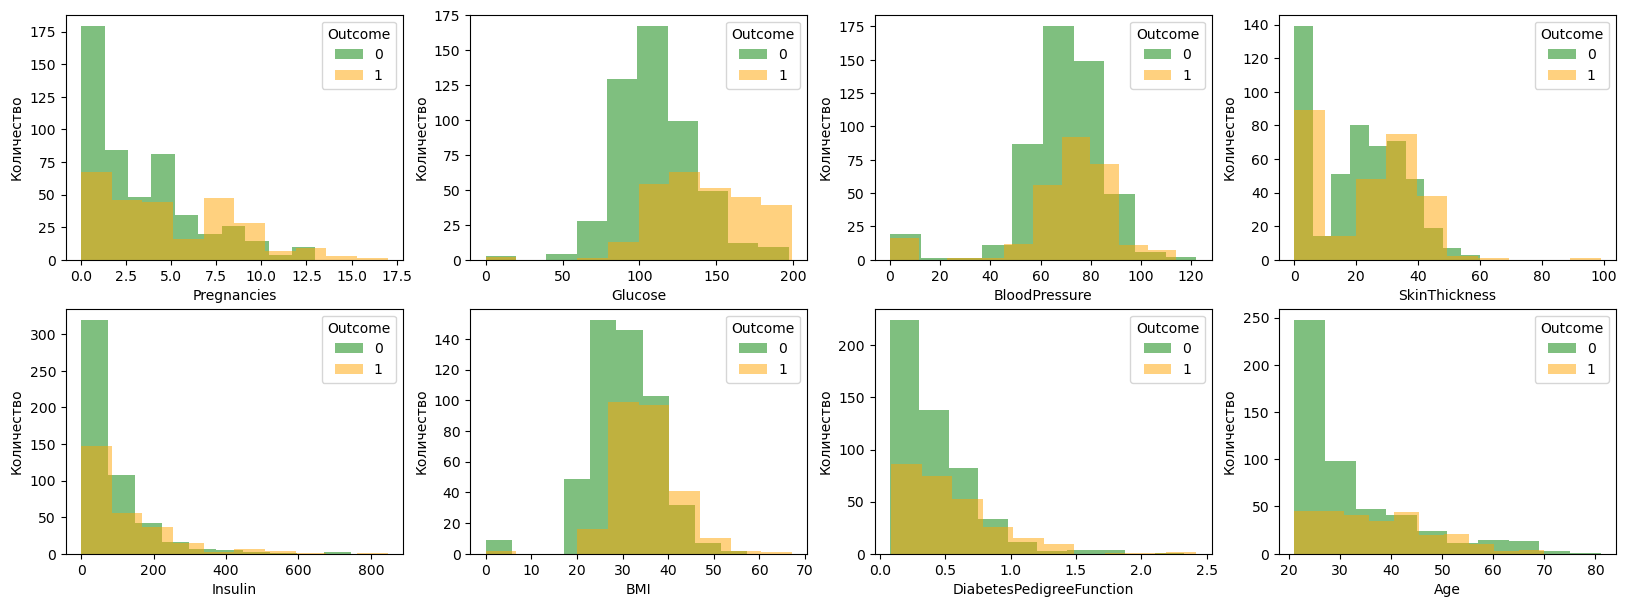

In [162]:
colors = ['green','orange']
feaches = ['Pregnancies',
           'Glucose',
           'BloodPressure',
           'SkinThickness',
           'Insulin',
           'BMI',
           'DiabetesPedigreeFunction',
           'Age']

plt.figure(figsize=(20,7))

for f in range(8):
  plt.subplot(2, 4, f+1)
  for i in range(2):
    color = colors[i]
    data = df1[df1['Outcome'] == i]

    plt.hist(data[feaches[f]], color=color, alpha=0.5)

  #plt.title(f'Распределение {feaches[f]}')
  plt.xlabel(feaches[f])
  plt.ylabel('Количество')
  plt.legend([0,1], title='Outcome');


 **Выводы**

Датасет довольно мал, чтобы делать прогнозы. Выборка несбалансирована: пациентов с риском в 2 раза меньше, чем без.

Из графиков видно, что на результат влияют почти все параметры: Артериальное давление (BloodPressure) в меньшей степени

---

In [163]:
df2 = pd.read_csv('dataset_2.csv')
df2.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [164]:
df2.shape

(848, 16)

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        830 non-null    float64
 3   sex              848 non-null    object 
 4   is_smoking       848 non-null    object 
 5   cigsPerDay       841 non-null    float64
 6   BPMeds           839 non-null    float64
 7   prevalentStroke  848 non-null    int64  
 8   prevalentHyp     848 non-null    int64  
 9   diabetes         848 non-null    int64  
 10  totChol          836 non-null    float64
 11  sysBP            848 non-null    float64
 12  diaBP            848 non-null    float64
 13  BMI              843 non-null    float64
 14  heartRate        848 non-null    float64
 15  glucose          764 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 106.1+ KB


In [166]:
# удалить строки, где есть хоть 1 Nan
df2.dropna(inplace=True)

In [167]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729 entries, 0 to 846
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               729 non-null    int64  
 1   age              729 non-null    int64  
 2   education        729 non-null    float64
 3   sex              729 non-null    object 
 4   is_smoking       729 non-null    object 
 5   cigsPerDay       729 non-null    float64
 6   BPMeds           729 non-null    float64
 7   prevalentStroke  729 non-null    int64  
 8   prevalentHyp     729 non-null    int64  
 9   diabetes         729 non-null    int64  
 10  totChol          729 non-null    float64
 11  sysBP            729 non-null    float64
 12  diaBP            729 non-null    float64
 13  BMI              729 non-null    float64
 14  heartRate        729 non-null    float64
 15  glucose          729 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usage: 96.8+ KB


In [168]:
df2['sex'].unique()

array(['M', 'F'], dtype=object)

In [169]:
df2['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [170]:
# заменить 'sex' и 'is_smoking' булевыми столбцами

df2['sex'] = df2['sex'].map({'M': 1, 'F': 0})
df2['is_smoking'] = df2['is_smoking'].map({'NO': 0, 'YES': 1})

In [171]:
pd.merge(df1, df2, left_on=['BMI'], right_on=['BMI'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,id,...,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose
0,1,85,66,29,0,26.6,0.351,31,0,3808,...,20.0,0.0,0,1,0,256.0,144.0,96.0,75.0,83.0
1,1,81,72,18,40,26.6,0.283,24,0,3808,...,20.0,0.0,0,1,0,256.0,144.0,96.0,75.0,83.0
2,2,155,74,17,96,26.6,0.433,27,1,3808,...,20.0,0.0,0,1,0,256.0,144.0,96.0,75.0,83.0
3,6,166,74,0,0,26.6,0.304,66,0,3808,...,20.0,0.0,0,1,0,256.0,144.0,96.0,75.0,83.0
4,10,139,80,0,0,27.1,1.441,57,0,3679,...,20.0,0.0,0,1,0,257.0,158.5,107.0,66.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,107,50,19,0,28.3,0.181,29,0,4218,...,9.0,0.0,0,0,0,163.0,117.5,75.0,75.0,70.0
201,1,140,74,26,180,24.1,0.828,23,0,3690,...,10.0,0.0,0,0,0,240.0,112.0,83.0,75.0,77.0
202,1,140,74,26,180,24.1,0.828,23,0,3977,...,6.0,0.0,0,0,0,219.0,120.0,70.0,57.0,73.0
203,1,140,74,26,180,24.1,0.828,23,0,4010,...,15.0,0.0,0,0,0,229.0,111.0,85.0,75.0,74.0


Совпадений по BMI только 222, поэтому использовать это поле для слияния таблиц невыгодно.

Перевести BMI по интерпретатору:
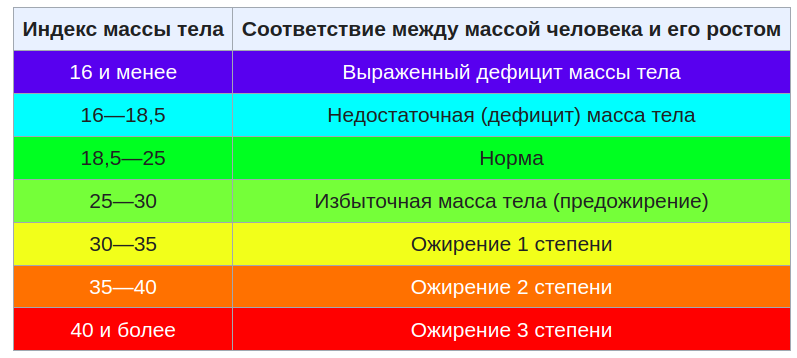

In [172]:
def get_bmi_category(bmi):
  bmi_limits = [16, 18.5, 25, 30, 35, 40]
  if bmi == 0:
    return 0
  for i in range(6):
    if bmi < bmi_limits[i]:
      return i+1
  return 7



In [173]:
df1['BMI_interpr'] = df1['BMI'].apply(get_bmi_category)
df1[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,5,33.6
1,4,26.6
2,3,23.3
3,4,28.1
4,7,43.1
...,...,...
763,5,32.9
764,6,36.8
765,4,26.2
766,5,30.1


In [174]:
df2['BMI_interpr'] = df2['BMI'].apply(get_bmi_category)
df2[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,3,24.42
1,4,28.61
3,3,23.40
5,3,22.49
6,4,25.18
...,...,...
841,3,23.88
842,3,24.30
843,4,27.42
844,3,23.08


In [175]:
# соединяем таблицы по целевым столбцам, возрасту и категории индекса массы
merged_df = pd.merge(df1, df2, left_on=['Age', 'BMI_interpr', 'Outcome'], right_on=['age','BMI_interpr', 'diabetes'])
merged_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI_x,DiabetesPedigreeFunction,Age,Outcome,BMI_interpr,...,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI_y,heartRate,glucose
0,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,220.0,136.0,84.0,26.84,75.0,64.0
1,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,287.0,136.0,92.0,26.24,65.0,71.0
2,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,194.0,199.5,107.0,26.84,60.0,69.0
3,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,193.0,104.0,64.0,26.00,62.0,87.0
4,10,139,80,0,0,27.1,1.441,57,0,4,...,0.0,0,0,0,238.0,128.5,87.5,25.38,80.0,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,1,0,193.0,142.5,100.0,24.15,82.0,69.0
577,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,1,0,297.0,164.0,102.0,24.50,75.0,95.0
578,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,0,0,303.0,117.0,71.0,22.01,108.0,85.0
579,2,105,75,0,0,23.3,0.560,53,0,3,...,0.0,0,0,0,225.0,92.0,69.0,24.17,56.0,68.0


In [176]:
# исключим нереальные наблюдения (мужчины с беременностью)
merged_df = merged_df[(merged_df['sex'] == 0) | (merged_df['Pregnancies'] == 0)]

In [177]:
merged_df.columns

# удалить BMI_x и BMI_y, id и дубликаты Age, diabetes

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI_x', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMI_interpr',
       'id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI_y', 'heartRate', 'glucose'],
      dtype='object')

In [178]:
df_clear = merged_df[['age', 'sex', 'education', 'Pregnancies', 'Glucose', 'BloodPressure',
                      'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI_interpr',
                      'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
                      'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'Outcome']]
df_clear

,age,sex,education,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI_interpr,...,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,heartRate,glucose,Outcome
1,57,0,1.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,287.0,136.0,92.0,65.0,71.0,0
2,57,0,1.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,194.0,199.5,107.0,60.0,69.0,0
10,57,0,4.0,10,139,80,0,0,1.441,4,...,0.0,0.0,0,0,160.0,105.0,70.0,52.0,61.0,0
14,57,0,2.0,13,145,82,19,110,0.245,3,...,0.0,0.0,0,0,163.0,112.0,71.0,70.0,78.0,0
15,57,0,3.0,13,145,82,19,110,0.245,3,...,15.0,0.0,0,0,250.0,125.0,74.0,80.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,56,0,3.0,10,94,72,18,0,0.595,3,...,0.0,0.0,0,0,248.0,112.5,60.0,75.0,92.0,0
575,56,0,1.0,10,94,72,18,0,0.595,3,...,0.0,0.0,0,1,296.0,180.0,90.0,75.0,120.0,0
577,53,0,4.0,2,105,75,0,0,0.560,3,...,1.0,0.0,0,1,297.0,164.0,102.0,75.0,95.0,0
578,53,0,2.0,2,105,75,0,0,0.560,3,...,0.0,0.0,0,0,303.0,117.0,71.0,108.0,85.0,0


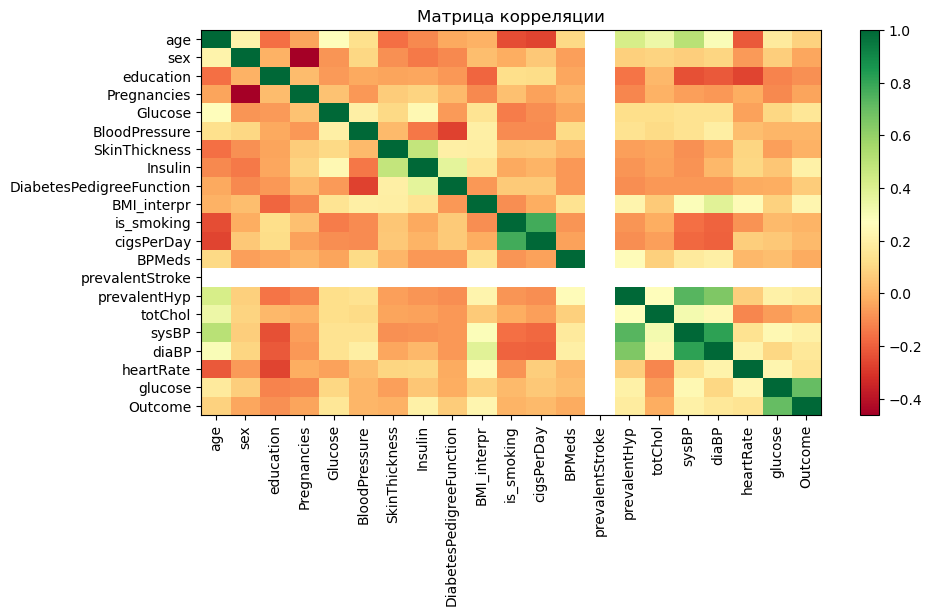

In [179]:
numeric_df = df_clear.select_dtypes(include=['number'])

# Вычисляем матрицу корреляций
correlation_matrix = numeric_df.corr()

# Визуализация
plt.figure(figsize=(10, 5))
plt.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto')
plt.title('Матрица корреляции')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.colorbar()
plt.show();


In [180]:
df2['prevalentStroke'].value_counts()

# эту колонку исключим из выборки

0    726
1      3
Name: prevalentStroke, dtype: int64

In [181]:
df_clear.columns.to_list()

['age',
 'sex',
 'education',
 'Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'DiabetesPedigreeFunction',
 'BMI_interpr',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'totChol',
 'sysBP',
 'diaBP',
 'heartRate',
 'glucose',
 'Outcome']

**Выводы**

Высокая кореляция между показателями давления, курением и количеством сигарет.

После объединения количество данных еще больше уменьшилось.

---

In [182]:
df3 = pd.read_csv('dataset_3.csv')
df3.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [183]:
df3.shape

(253680, 22)

In [184]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [185]:
# проверить и удалить дубликаты
df3.duplicated().sum()

23899

In [186]:
df3.drop_duplicates(inplace = True)

In [187]:
# индекс массы перевести в категории, как в первых датасетах
df3['BMI_interpr'] = df3['BMI'].apply(get_bmi_category)
df3[['BMI_interpr','BMI']]

,BMI_interpr,BMI
0,7,40.0
1,4,25.0
2,4,28.0
3,4,27.0
4,3,24.0
...,...,...
253675,7,45.0
253676,2,18.0
253677,4,28.0
253678,3,23.0


In [188]:
df3['Age'].value_counts()

# возраст переведён в 14 категорий, для слияния таблиц не годится

9.0     29736
10.0    29168
8.0     27301
7.0     23140
11.0    22041
6.0     17299
13.0    16813
12.0    15394
5.0     14050
4.0     12234
3.0     10025
2.0      7068
1.0      5512
Name: Age, dtype: int64

In [189]:
# перевести в целые бинарные значения и категории
int_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

df3[int_cols] = df3[int_cols].astype(int)

Для слияния таблиц используем 'HighBP' и 'HighChol'.

В первой таблице используем 'sysBP' и 'diaBP', переведем в HighBP.
'totChol' по нормам лаборатории переведем в HighChol.

In [190]:
# если хоть один показатель ('sysBP' или 'diaBP') выше нормы, то ставим высокое давление
df_clear['HighBP'] = ((df_clear['sysBP'] > 140) | (df_clear['diaBP'] > 90)).astype(int)
df_clear['HighBP']

C:\Users\Alisa\AppData\Local\Temp\ipykernel_17576\3663291077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['HighBP'] = ((df_clear['sysBP'] > 140) | (df_clear['diaBP'] > 90)).astype(int)


1      1
2      1
10     0
14     0
15     0
      ..
574    0
575    1
577    1
578    0
579    0
Name: HighBP, Length: 334, dtype: int32

In [191]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 1 to 579
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       334 non-null    int64  
 1   sex                       334 non-null    int64  
 2   education                 334 non-null    float64
 3   Pregnancies               334 non-null    int64  
 4   Glucose                   334 non-null    int64  
 5   BloodPressure             334 non-null    int64  
 6   SkinThickness             334 non-null    int64  
 7   Insulin                   334 non-null    int64  
 8   DiabetesPedigreeFunction  334 non-null    float64
 9   BMI_interpr               334 non-null    int64  
 10  is_smoking                334 non-null    int64  
 11  cigsPerDay                334 non-null    float64
 12  BPMeds                    334 non-null    float64
 13  prevalentStroke           334 non-null    int64  
 14  prevalentH

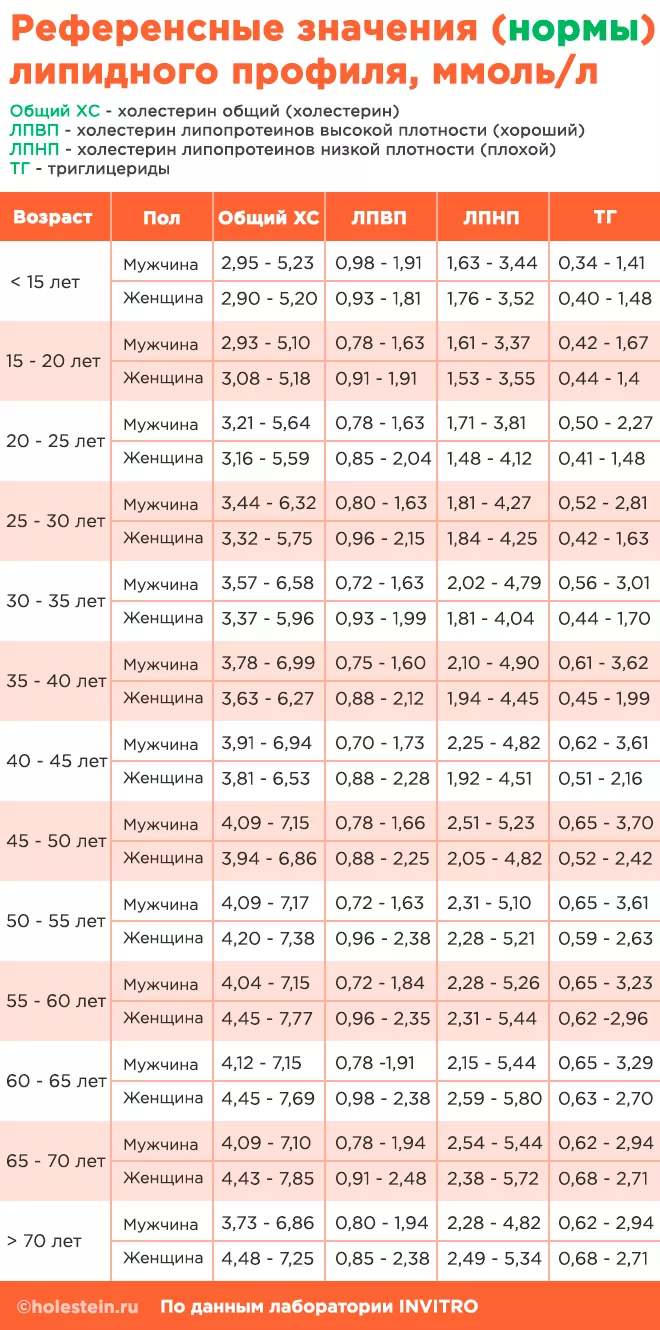

мг/дл х 0,026 ==> ммоль/л.

In [192]:
# выписать верхние значения нормы в переменные
ages = list(range(15, 71, 5))
ages.append(200)
male = [5.23, 5.10, 5.64, 6.32, 6.58, 6.99, 6.94, 7.15, 7.17, 7.15, 7.15, 7.1, 6.86]
female = [5.2, 5.18, 5.59, 5.75, 5.96, 6.27, 6.53, 6.86, 7.38, 7.77, 7.69, 7.85, 7.25]
k = 0.026
len(ages), len(male), len(female)

(13, 13, 13)

In [193]:
def is_high_chol(row):
  norm = zip(ages, male) if row['sex'] == 0 else zip(ages, female)
  for age, chol in norm:
    if row['age'] < age:
      return int(row['totChol'] * k > chol)

In [194]:
df_clear['HighChol'] = df_clear.apply(is_high_chol, axis=1)
df_clear['HighChol']

C:\Users\Alisa\AppData\Local\Temp\ipykernel_17576\1955731238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clear['HighChol'] = df_clear.apply(is_high_chol, axis=1)


1      1
2      0
10     0
14     0
15     0
      ..
574    0
575    1
577    1
578    1
579    0
Name: HighChol, Length: 334, dtype: int64

In [195]:
data = pd.merge(df_clear, df3, left_on=['BMI_interpr','sex', 'Outcome', 'HighBP','HighChol'], right_on=['BMI_interpr', 'Sex', 'Diabetes_012', 'HighBP','HighChol'])

In [196]:
data.head()

,age,sex,education,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,BMI_interpr,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,57,0,1.0,10,139,80,0,0,1.441,4,...,1,1,5,30,30,1,0,9,4,8
1,57,0,1.0,10,139,80,0,0,1.441,4,...,1,0,3,0,0,1,0,11,4,4
2,57,0,1.0,10,139,80,0,0,1.441,4,...,1,0,3,6,0,1,0,9,4,6
3,57,0,1.0,10,139,80,0,0,1.441,4,...,1,0,4,0,10,1,0,12,6,2
4,57,0,1.0,10,139,80,0,0,1.441,4,...,1,0,2,0,0,1,0,11,4,3


In [197]:
data.shape

(3693198, 43)

In [198]:
data.columns

Index(['age', 'sex', 'education', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BMI_interpr',
       'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose', 'Outcome',
       'HighBP', 'HighChol', 'Diabetes_012', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [199]:
# удалить дублирующие колонки и явно коррелирующие
to_drop = ['sex', 'is_smoking', 'totChol', 'sysBP', 'diaBP', 'Diabetes_012', 'BMI', 'Age']
data.drop(to_drop, axis=1, inplace=True)

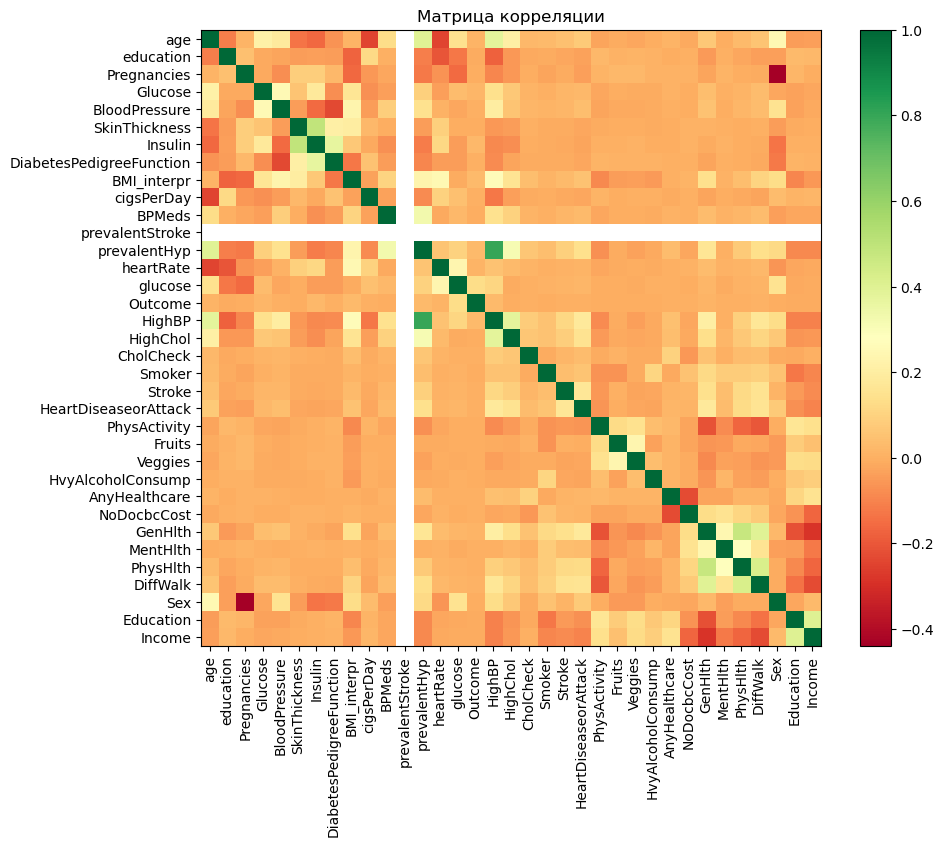

In [200]:
numeric_df = data.select_dtypes(include=['number'])

# Вычисляем матрицу корреляций
correlation_matrix = numeric_df.corr()

# Визуализация
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='RdYlGn', aspect='auto')
plt.title('Матрица корреляции')
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.colorbar()
plt.show();

In [201]:
data['Outcome'].value_counts()

0    3692558
1        640
Name: Outcome, dtype: int64

In [202]:
data['prevalentStroke'].value_counts()

0    3693198
Name: prevalentStroke, dtype: int64

In [203]:
data.drop(['prevalentStroke'], axis=1, inplace=True)

**Выводы**

При объединении таблиц формируются новые строки похожих наблюдений, чем можно расширить рабочий датасет.

Объединение несбалансированных выборок создает более несбалансированную.

Некоторые столбцы не подходят для объединения столбцов, хотя логически они должны содержать похожую информацию. Например, глюкоза в первых двух таблицах, образование, или возраст в третьей таблице.
В результате в данных появляются расхождения.

Можно добавить слияние по возрасту, предварительно заменив в первых двух таблицах возраст на 14 категорий. Итоговый датасет должен уменьшиться, исключатся комбинации, типа особа 25 лет в 13й возрастной категории.

---